the script can be running either in CMSSW environment or a system with pyhon2/root installed

In [1]:
import ROOT
import math
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.20/09


In [2]:
tf = ROOT.TFile.Open("root://cmseos.fnal.gov://store/user/tmengke/hgcdpg/samples/pu_1photon_E100.root")
tree = tf.Get("hgcAnalyzer/tree")

In [3]:
def dist(v1,v2):
    return math.sqrt((v1.X()-v2.X())**2+(v1.Y()-v2.Y())**2+(v1.Z()-v2.Z())**2)

matching the trackster with highest number of layerclusters from caloparticles
and save the index of that trackster

In [6]:
tk0_E=[]
matchE=[]
tk0=[]
for it,t in enumerate(tree):
    match=[]
    tvx={}
    #finding matched layerclusters
    for ix,x in enumerate(t.tracksterMerge_vertices):
        tmp=set(t.cp2lcId[0])&set(x)
        match.append((len(tmp),ix,tmp))
    match.sort(reverse=True)
    tk0_idx=match[0][1]
    tk0.append(tk0_idx)
    tk0_E.append(t.tracksterMerge_raw_energy[tk0_idx])
    mLc=np.array(list(match[0][2]))
    cplctmp=0
    
    #calculate matching energy
    for x in mLc:
        for iy, y in enumerate(t.cp2lcId[0]):
            if x==y:
                for iz,z in enumerate(t.tracksterMerge_vertices[tk0_idx]):
                    if x==z:
                        cplctmp+=t.cp2lcEnergy[0][iy]/t.tracksterMerge_vertex_multiplicity[tk0_idx][iz]
    matchE.append(cplctmp)
    if it%100==0:
        print (it)

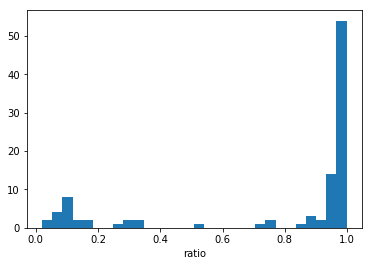

In [7]:
plt.hist(np.array(matchE)/np.array(tk0_E),bins=30)
plt.xlabel("ratio")
plt.show()

using the matched trackster index to do the analysis

In [12]:
tk0_Pt=[]
for it,t in enumerate(tree):
    tk0_Pt.append(t.tracksterMerge_raw_pt[tk0[it]])
    if it==100:
        break

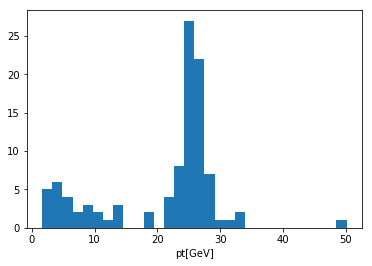

In [13]:
plt.hist(tk0_Pt,bins=30)
plt.xlabel("pt[GeV]")
plt.show()